# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 464.583
- Unique drugs: 162.880
- Unique targets: 2.705
- Ratio observed: 0.105%

In [25]:
from mb_vae_dti.loading.datasets import load_metz

metz_df = load_metz()
metz_df.head()


,SMILES,ProteinSequence,Ki
0,O[C@@H]1CC[C@H](CC1)Nc2nc(Cl)cc(n2)c3c[nH]c4nc...,MPHPRRYHSSERGSRGSYREHYRSRKHKRRRSRSWSSSSDRTRRRR...,8.1
1,O[C@@H]1CC[C@H](CC1)Nc2nc(Cl)cc(n2)c3c[nH]c4nc...,MGPGVLLLLLVATAWHGQGIPVIEPSVPELVVKPGATVTLRCVGNG...,6.7
2,O[C@@H]1CC[C@H](CC1)Nc2nc(Cl)cc(n2)c3c[nH]c4nc...,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,5.9
3,O[C@@H]1CC[C@H](CC1)Nc2nc(Cl)cc(n2)c3c[nH]c4nc...,MLARRKPVLPALTINPTIAEGPSPTSEGASEANLVDLQKKLEELEL...,7.3
4,O[C@@H]1CC[C@H](CC1)Nc2nc(Cl)cc(n2)c3c[nH]c4nc...,MSDSKCDSQFYSVQVADSTFTVLKRYQQLKPIGSGAQGIVCAAFDT...,6.6


In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

In [2]:
# Import the necessary functions from the loading module
from mb_vae_dti.loading import (
    load_or_create_merged_dataset,
    get_dataset_stats,
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_dataset_overlap,
    plot_promiscuity_analysis
)

03:01:28 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap


## Load, merge and filter the datasets


In [14]:
# Load the merged dataset & apply filters
df = load_or_create_merged_dataset(
    # dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    dataset_names=["DAVIS", "KIBA"],
    force_reload=False,
    apply_filters=True,
    verbose=True
)

Found local copy...
Loading...
Done!
To log space...
The original data has been updated!
Found local copy...
Loading...


Creating merged dataset from: DAVIS, KIBA
Loading DAVIS dataset...
Loaded DAVIS dataset with 25772 interactions


Loading KIBA dataset...


Done!


Loaded KIBA dataset with 117657 interactions


Merged dataset contains 142386 unique drug-target pairs
Filtering dataset with 142386 rows...
  - Max heavy atoms: 64
  - Max protein sequence length: 1280
Computing heavy atom counts for 2127 molecules...
Computed heavy atom counts for 2127 molecules
Filtering complete. Rows reduced from 142386 to 127619
Saved dataset to data/processed/merged_DAVIS_KIBA_filtered.csv


In [15]:
# Get statistics of the merged dataset
get_dataset_stats(df)

{'n_interactions': 127619,
 'n_unique_drugs': 2095,
 'n_unique_targets': 388,
 'avg_drug_smiles_length': 47.786959621999856,
 'avg_target_aa_length': 643.3761038716806,
 'Y_pKd_mean': 5.406412140965316,
 'Y_pKd_std': 0.8243363022998047,
 'Y_pKd_min': 4.999995657076895,
 'Y_pKd_max': 9.935542010773082,
 'Y_KIBA_mean': 11.70627341827158,
 'Y_KIBA_std': 0.82103579237372,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'in_DAVIS_count': 23188,
 'in_DAVIS_percentage': 18.169708272279205,
 'in_KIBA_count': 105361,
 'in_KIBA_percentage': 82.55902334291916}

## Visualize the merged dataset

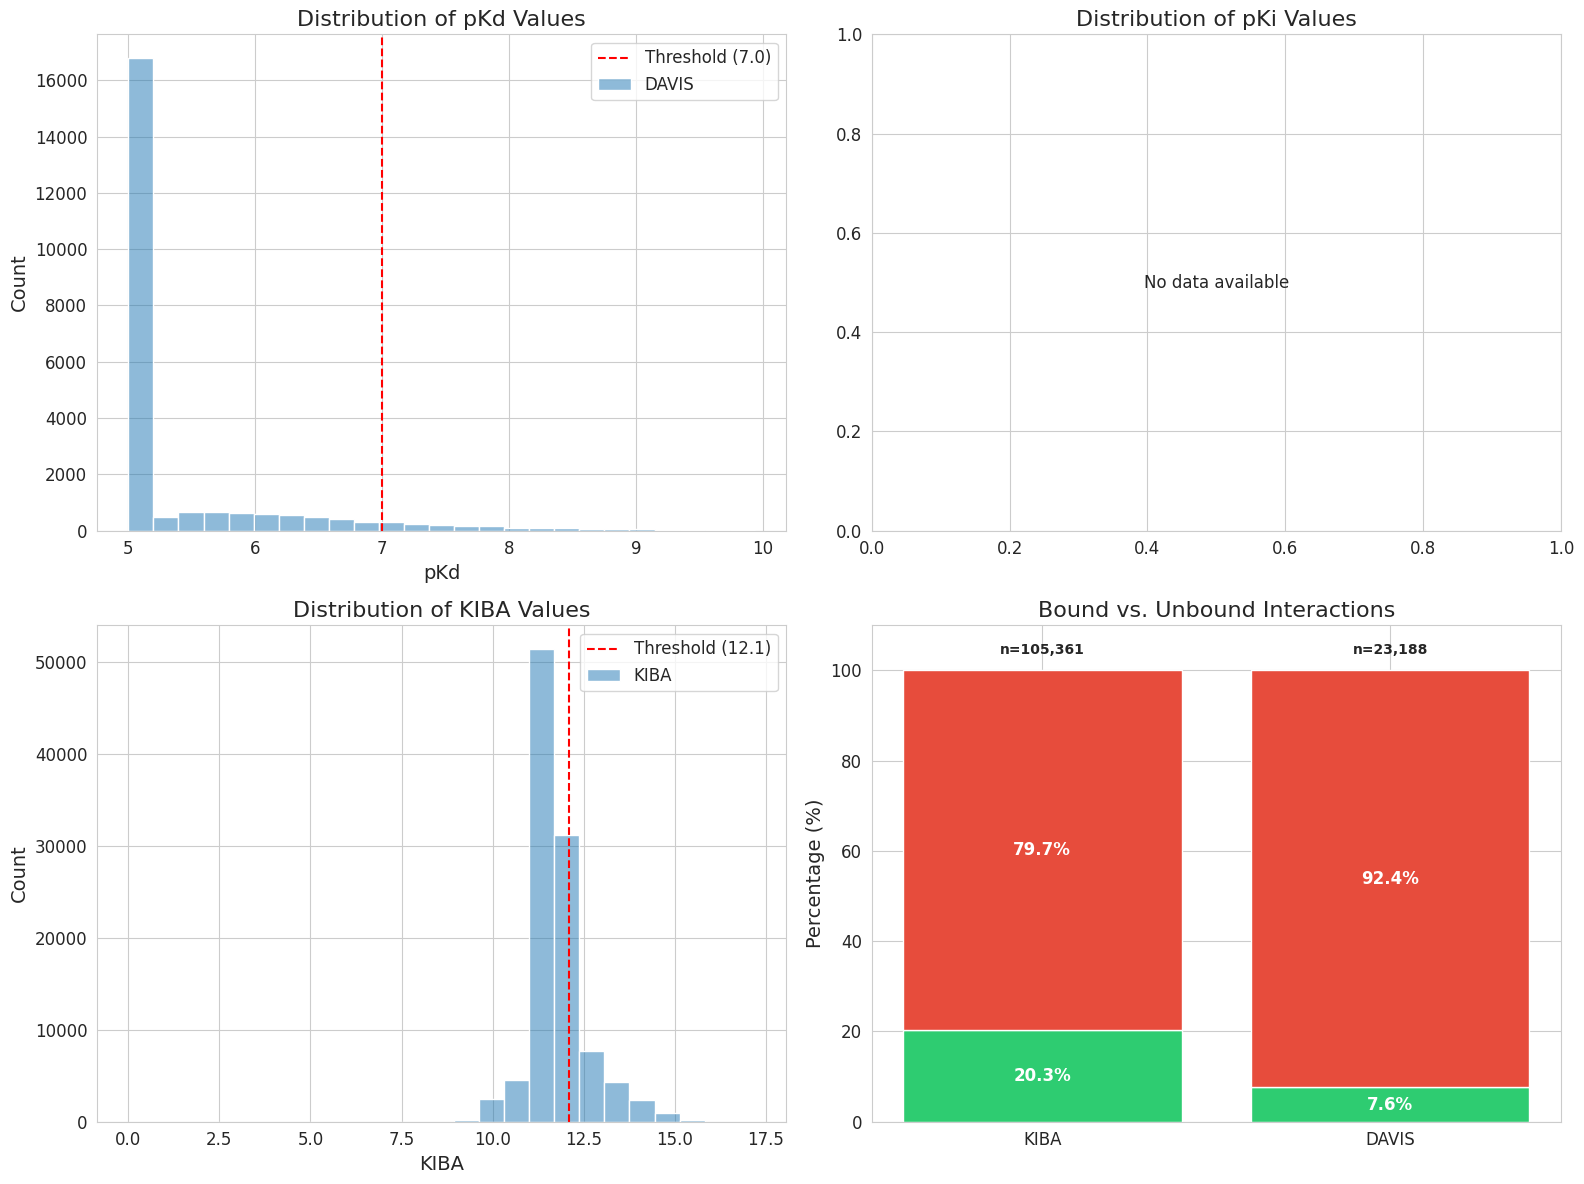

'data/images/interaction_distribution.png'

In [20]:
# df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
# df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
# df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
# df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
# df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd'])

plot_interaction_distribution(
    # [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    # ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    [df_Davis, df_KIBA],
    ["DAVIS", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

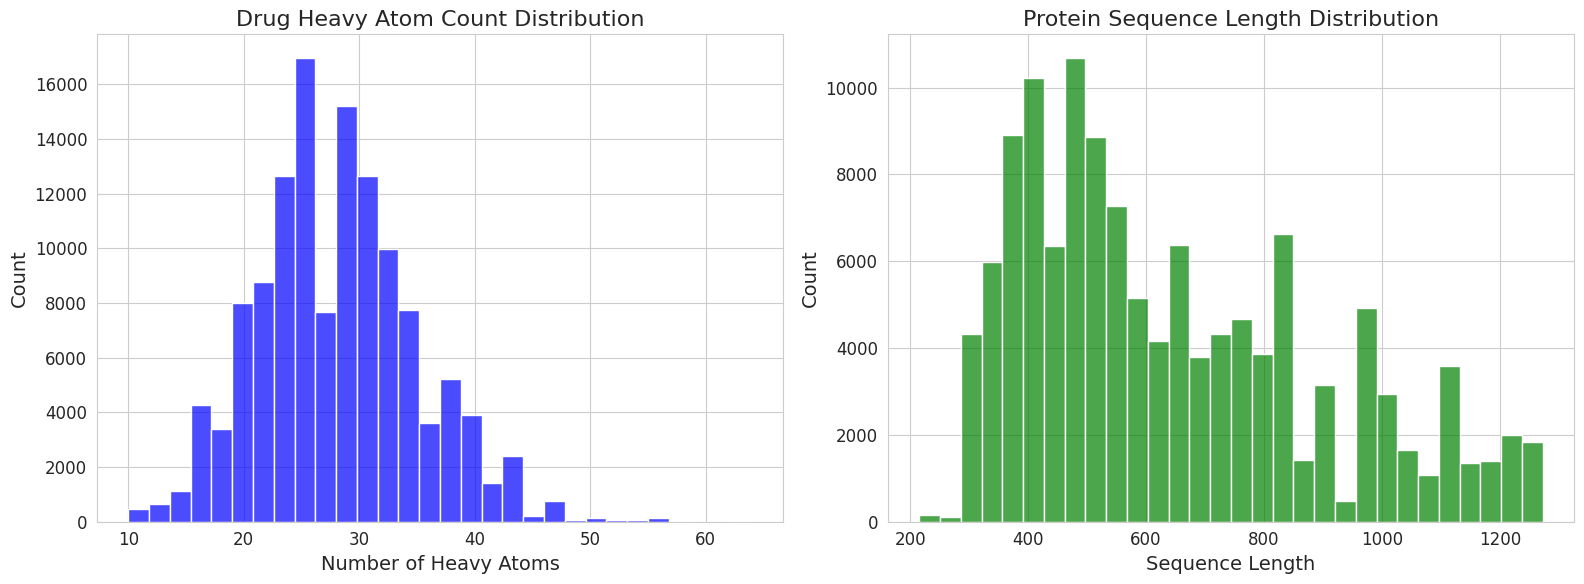

'data/images/dataset_statistics.png'

In [21]:
plot_dataset_statistics(df)

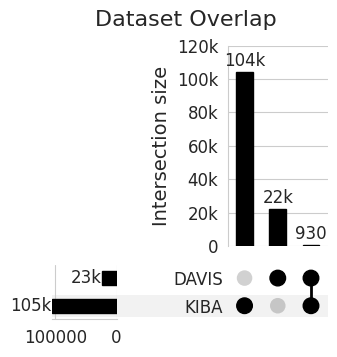

'data/images/dataset_overlap.png'

In [22]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

Drug Interaction Statistics:
Drugs with 0 interactions: 0 (0.0%)
Drugs with 1 interaction: 0 (0.0%)
Mean interactions per drug: 60.9
Median interactions per drug: 31.0
Max interactions per drug: 366
Percentiles:
25th: 13, 50th: 31, 75th: 108
90th: 123, 95th: 133, 99th: 341

Target Interaction Statistics:
Targets with 0 interactions: 0 (0.0%)
Targets with 1 interaction: 0 (0.0%)
Mean interactions per target: 328.9
Median interactions per target: 80.5
Max interactions per target: 1,287
Percentiles:
25th: 68, 50th: 80, 75th: 633
90th: 899, 95th: 1034, 99th: 1169



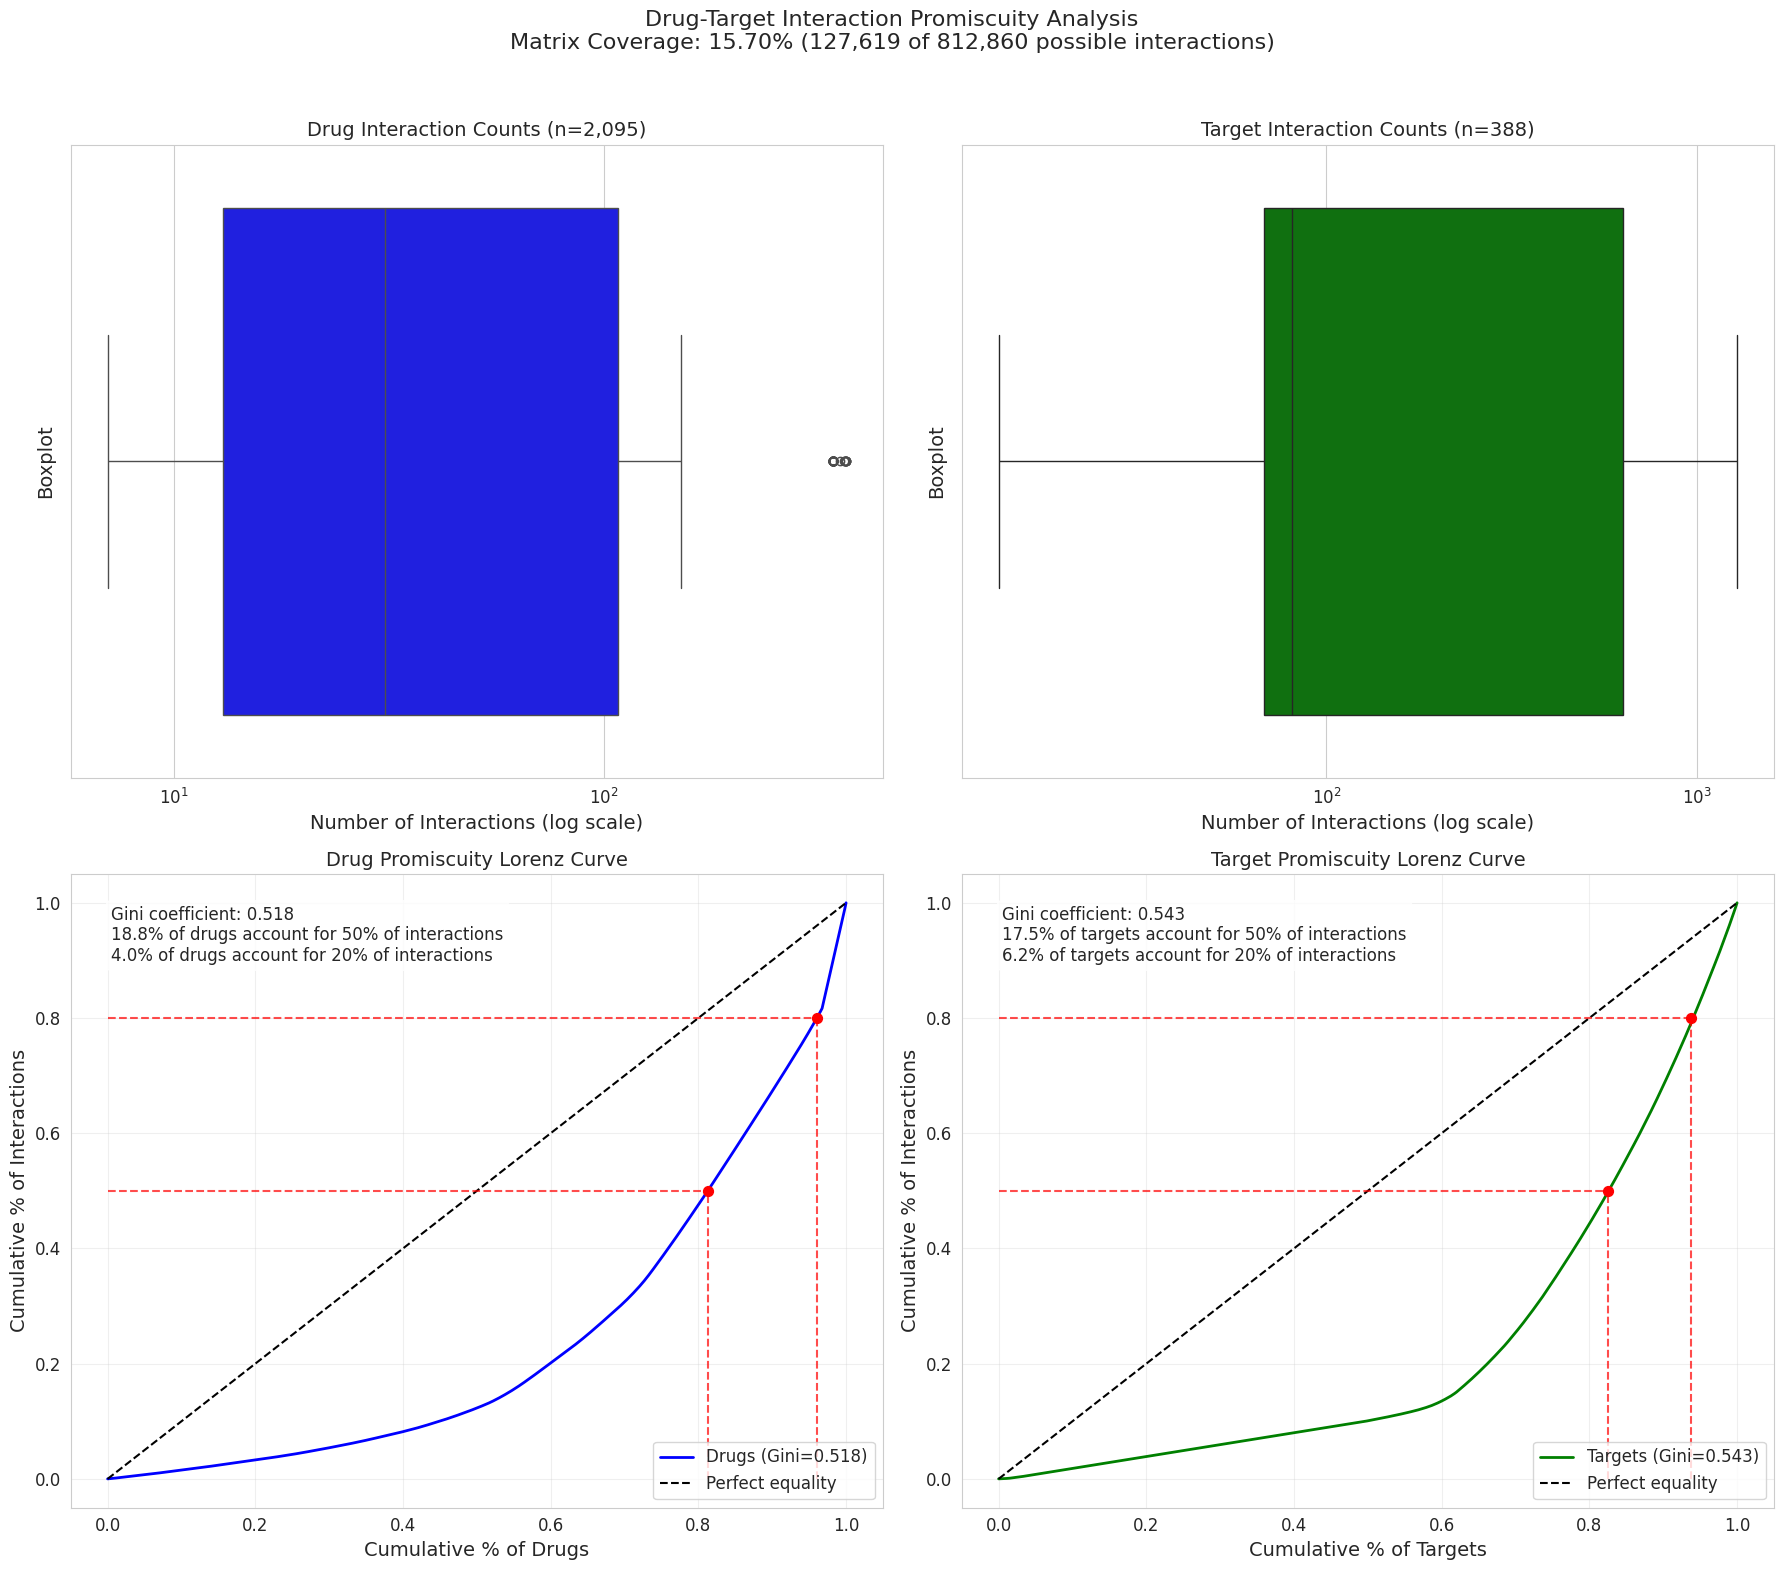

'data/images/promiscuity_analysis.png'

In [23]:
plot_promiscuity_analysis(df)

In [24]:
df

,Drug_SMILES,Target_AA,Y,Y_pKd,Y_KIBA,in_DAVIS,in_KIBA
0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,False,4.999996,NaN,True,False
1,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,True,8.920819,NaN,True,False
2,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,True,7.995679,NaN,True,False
3,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,False,4.999996,NaN,True,False
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,False,4.999996,NaN,True,False
...,...,...,...,...,...,...,...
142381,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,False,NaN,10.49794,False,True
142382,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,False,NaN,10.49794,False,True
142383,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,False,NaN,10.49794,False,True
142384,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,False,NaN,10.49794,False,True
